In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import gensim

c:\Users\macie\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
tweets = pd.read_csv(".//data//tweets.csv", encoding="latin-1")


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1048575 non-null  int64 
 1   ID      1048575 non-null  int64 
 2   Date    1048575 non-null  object
 3   flag    1048575 non-null  object
 4   User    1048575 non-null  object
 5   Text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [7]:
tweets["Target"].value_counts().min()

248576

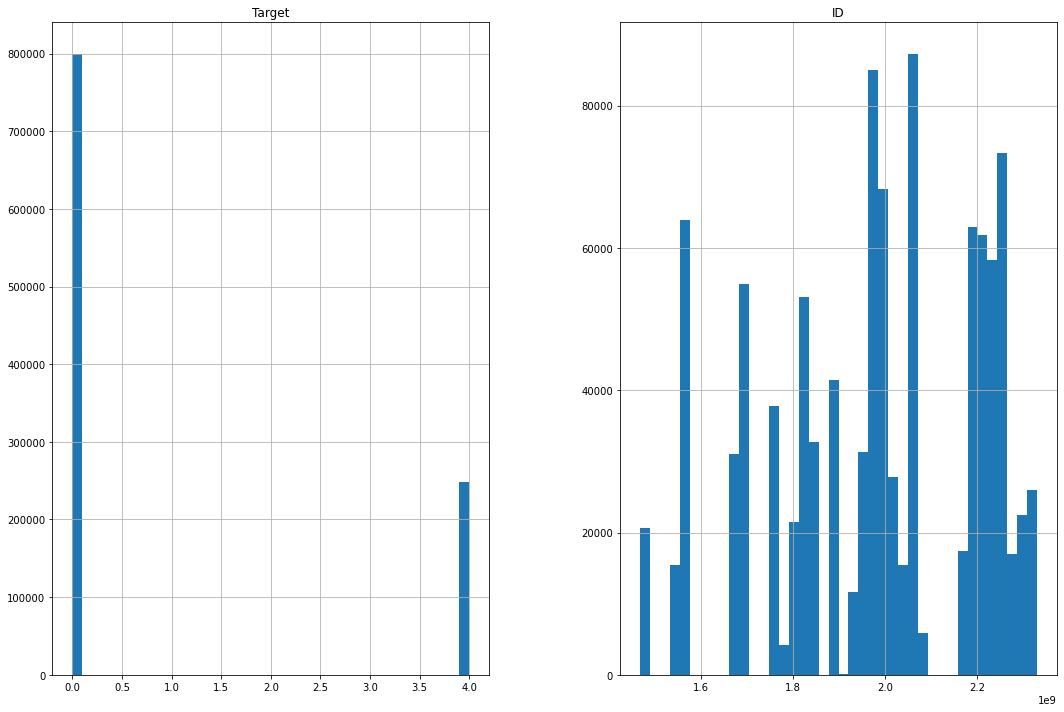

In [8]:
tweets.hist(bins = 40, figsize=(18, 12))

plt.show()

In [9]:
tweets.head()

,Target,ID,Date,flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [10]:
tweets.shape
tweets.Text

0          is upset that he can't update his Facebook by ...
1          @Kenichan I dived many times for the ball. Man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @Kwesidei not the whole crew 
                                 ...                        
1048570             My GrandMa is making Dinenr with my Mum 
1048571    Mid-morning snack time... A bowl of cheese noo...
1048572    @ShaDeLa same here  say it like from the Termi...
1048573               @DestinyHope92 im great thaanks  wbuu?
1048574                 cant wait til her date this weekend 
Name: Text, Length: 1048575, dtype: object

In [11]:
tweets.iloc[0]['Text']



"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

****WORD2VEC 41,42 tutorial film****


In [12]:
tweet_text = tweets.Text.apply(gensim.utils.simple_preprocess)
tweet_text

0          [is, upset, that, he, can, update, his, facebo...
1          [kenichan, dived, many, times, for, the, ball,...
2          [my, whole, body, feels, itchy, and, like, its...
3          [nationwideclass, no, it, not, behaving, at, a...
4                          [kwesidei, not, the, whole, crew]
                                 ...                        
1048570     [my, grandma, is, making, dinenr, with, my, mum]
1048571    [mid, morning, snack, time, bowl, of, cheese, ...
1048572    [shadela, same, here, say, it, like, from, the...
1048573              [destinyhope, im, great, thaanks, wbuu]
1048574          [cant, wait, til, her, date, this, weekend]
Name: Text, Length: 1048575, dtype: object

In [9]:
model = gensim.models.Word2Vec(
    window=10, # The maximum distance between the current and predicted word within a sentence.
    min_count=1, # Ignores all words with total frequency lower than this.
    workers=8 # Use these many worker threads to train the model (=faster training with multicore machines).
)

In [10]:
model.build_vocab(tweet_text, progress_per=1000)

In [11]:
model.epochs

5

In [12]:
model.corpus_count

1048575

In [13]:
model.train(tweet_text, total_examples=model.corpus_count, epochs=model.epochs) # train the model

(54085043, 65609990)

In [14]:
model.save("./word2vec-twitter-text.model")

In [30]:
model.wv.most_similar("bad")
model.wv.similarity("good", "awful")

0.5308738

In [16]:
tweets['Positivity'] = tweets['Text'].apply(lambda text: np.mean([model.wv.similarity(word, 'good') for word in gensim.utils.simple_preprocess(text)]))


c:\Users\macie\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [20]:
tweets.loc[(tweets.Positivity > 0.5) & (tweets.Target == 4)] # chyba slabo dziala


,Target,ID,Date,flag,User,Text,Positivity
802917,4,1468308109,Tue Apr 07 00:52:58 PDT 2009,NO_QUERY,Daisylittlestar,Good Morning,0.533486
804358,4,1468504184,Tue Apr 07 02:04:27 PDT 2009,NO_QUERY,VeraL,good morning,0.533486
805841,4,1468725445,Tue Apr 07 03:23:29 PDT 2009,NO_QUERY,dbreakenridge,Good morning,0.533486
806891,4,1468901047,Tue Apr 07 04:19:00 PDT 2009,NO_QUERY,Sbaby82,Good Morning,0.533486
806936,4,1468902113,Tue Apr 07 04:19:21 PDT 2009,NO_QUERY,iamnatassja,Good morning...good morning..good moooooorning,0.525264
...,...,...,...,...,...,...,...
1043600,4,1957346035,Fri May 29 00:13:16 PDT 2009,NO_QUERY,TammyElisabeth,Good morning,0.533486
1044628,4,1957458930,Fri May 29 00:34:00 PDT 2009,NO_QUERY,MissRasmus,Good morning,0.533486
1045011,4,1957501799,Fri May 29 00:42:05 PDT 2009,NO_QUERY,hawaiirob,"good paddle, good beer, good times time for g...",0.508980
1046914,4,1957712699,Fri May 29 01:22:01 PDT 2009,NO_QUERY,ellagracemusic,good morning,0.533486
